In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

DIR_PATH = "..\\data\\tickers\\ticker_data"
def get_tickers():
    tickers = [tick for tick in os.listdir(os.path.abspath(DIR_PATH)) if os.path.isfile(os.path.join(DIR_PATH, tick))]
    return tickers
    
t = get_tickers()
t

['AAPL.csv',
 'AMZN.csv',
 'AXP.csv',
 'BA.csv',
 'BAC.csv',
 'C.csv',
 'F.csv',
 'FB.csv',
 'GE.csv',
 'GOOG.csv',
 'GS.csv',
 'JPM.csv',
 'MS.csv',
 'MSFT.csv',
 'WFC.csv']

In [2]:
dfs = []
for tick in t:
    tick_path = os.path.join(os.path.abspath(DIR_PATH), tick)
    dfs.append(pd.read_csv(tick_path, header=0))

close_ = pd.DataFrame()
for tick, df in zip(t, dfs):
    close_[tick] = df["close"]

close_

,AAPL.csv,AMZN.csv,AXP.csv,BA.csv,BAC.csv,C.csv,F.csv,FB.csv,GE.csv,GOOG.csv,GS.csv,JPM.csv,MS.csv,MSFT.csv,WFC.csv
0,105.35,636.99,67.59,140.50,16.43,51.13,13.97,102.22,30.71,741.84,177.14,63.62,31.48,54.80,52.91
1,102.71,633.79,66.55,141.07,16.43,50.86,13.72,102.73,30.74,742.58,174.09,63.73,31.28,55.05,52.89
2,100.70,632.65,64.42,138.83,16.08,50.12,13.11,102.97,30.25,743.62,169.84,62.81,30.50,54.05,51.88
3,96.45,607.94,63.84,133.01,15.50,47.56,12.70,97.92,28.97,726.39,164.62,60.27,28.98,52.17,50.40
4,96.96,607.05,63.63,129.99,15.20,46.13,12.54,97.33,28.45,714.47,163.94,58.92,28.38,52.33,49.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,284.27,1789.21,124.74,333.00,35.22,78.59,9.47,205.12,11.19,1343.56,229.91,137.58,50.69,157.38,53.82
1002,289.91,1868.77,125.41,329.92,35.52,79.83,9.45,207.79,11.23,1360.40,231.21,139.04,51.11,158.67,54.15
1003,289.80,1869.80,125.19,330.14,35.35,79.67,9.36,208.10,11.18,1351.89,230.66,139.14,51.09,158.96,53.92
1004,291.52,1846.89,124.30,326.40,35.15,79.51,9.25,204.41,11.08,1336.14,229.80,138.63,50.96,157.59,53.60


In [3]:
close_.plot(figsize=(20, 15), grid=True)

plt.title("Daily Closing Stock Prices")
plt.ylabel("Price")
plt.xlabel("Trading Day")
# plt.savefig("closeprices")

NameError: name 'plt' is not defined

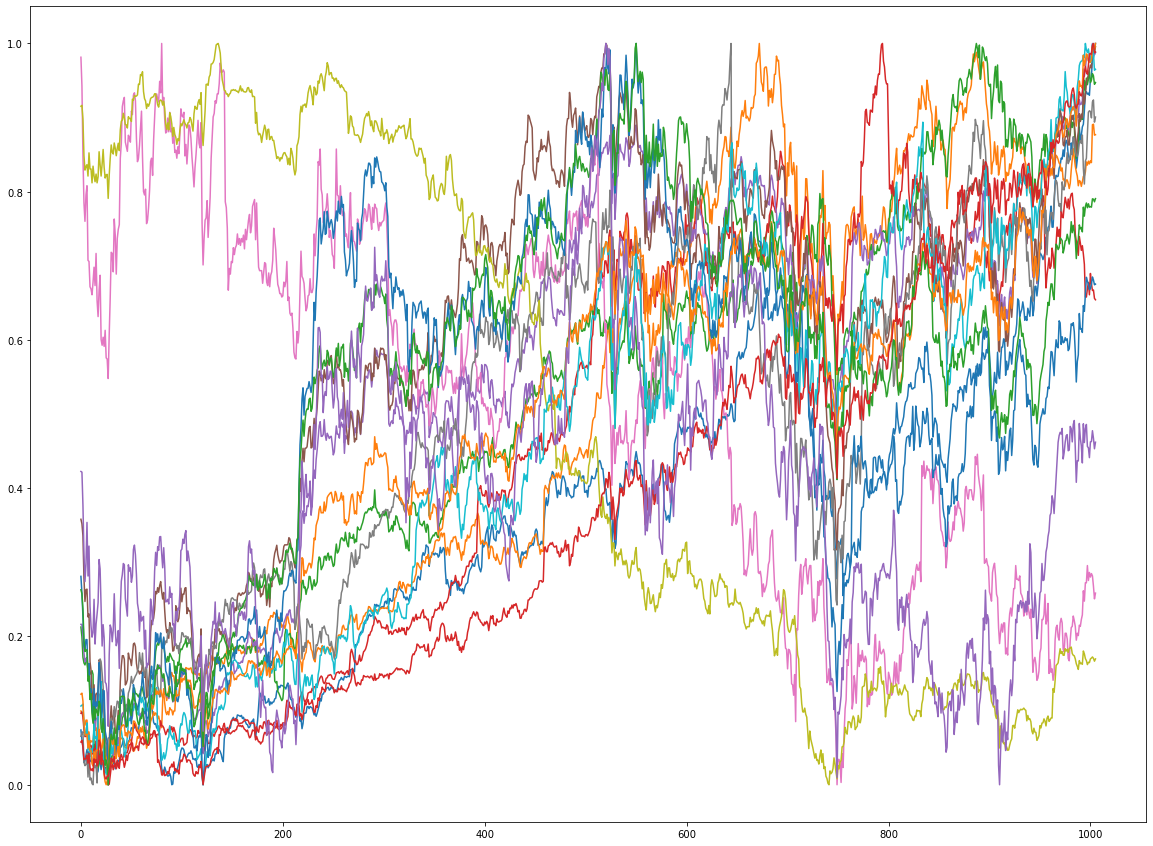

In [4]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
scaled = scaler.fit_transform(close_)
plt.figure(figsize=(20, 15))
plt.plot(scaled)

Text(0.5, 1.0, 'Autocorrelation Plots for all Stocks')

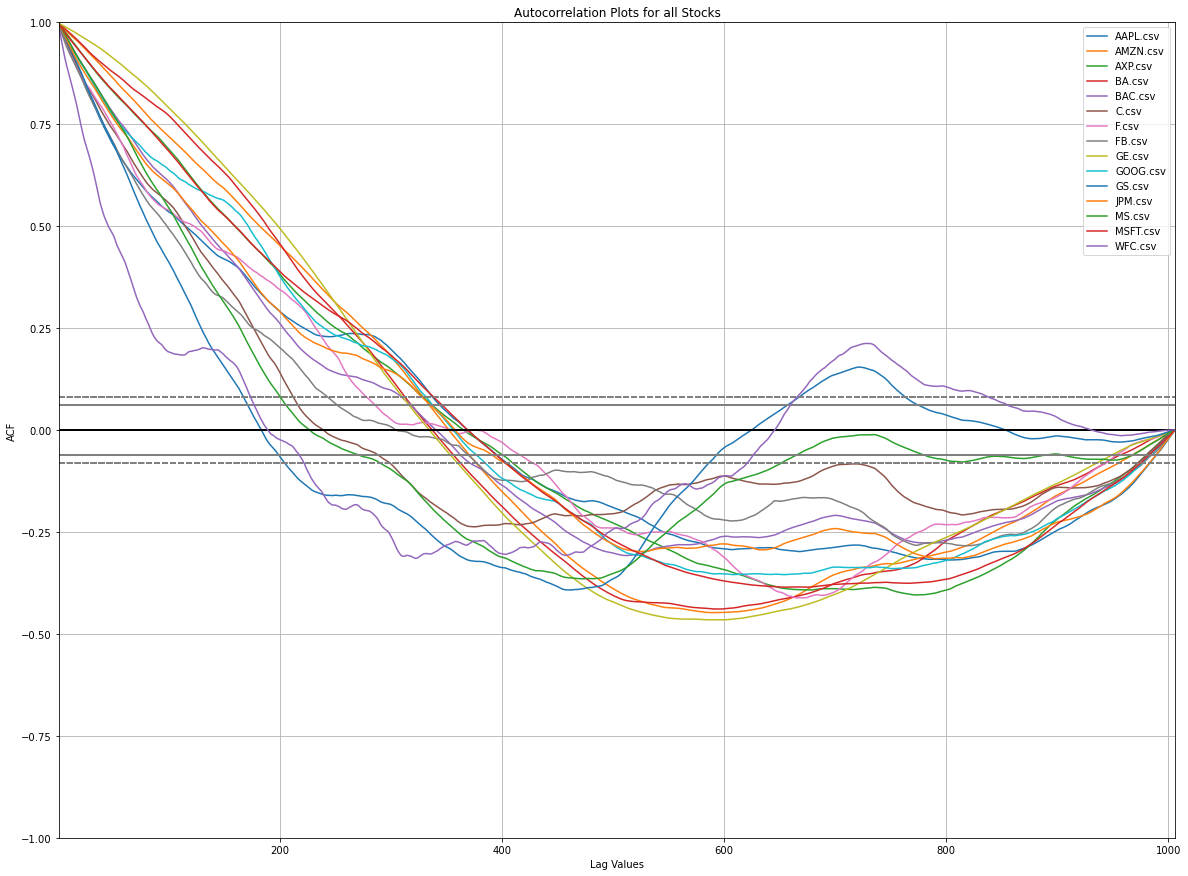

In [5]:
from pandas.plotting import autocorrelation_plot

plot.figure(figsize=(20, 15))

for tick, col in zip(t, range(len(scaled))):
    _ = autocorrelation_plot(scaled[:, col], label=tick)

_ = plot.legend(loc='upper right')

plt.xlabel("Lag Values")
plt.ylabel("ACF")
plt.title("Autocorrelation Plots for all Stocks")
# plt.savefig("ACF")

In [6]:
from pandas.plotting import scatter_matrix

dfs = [pd.DataFrame(df, columns=[tick]) for tick, df in zip(t, scaled)]

plot_frame = pd.concat(dfs, axis=0)
# _ = scatter_matrix(plot_frame, figsize=(20, 20), diagonal='kde')

Text(0.5, 0, 'Lag Values')

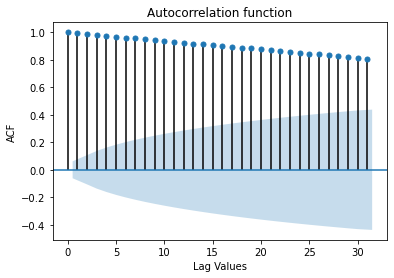

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(scaled[:, 0])

plt.title("Autocorrelation function")
plt.ylabel("ACF")
plt.xlabel("Lag Values")
# plt.savefig("smallACF")


#scaled[:, 0]

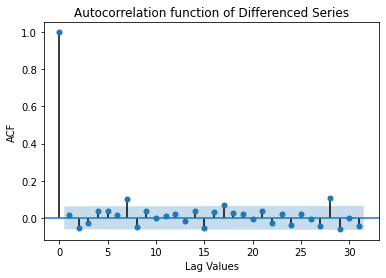

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.diff(scaled[:, 0]))

plt.title("Autocorrelation function of Differenced Series")
plt.ylabel("ACF")
plt.xlabel("Lag Values")
plt.savefig("ACFDifferenced")

Text(0, 0.5, 'PACF')

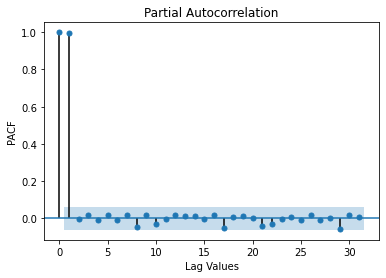

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(scaled[:, 0])
plt.xlabel("Lag Values")
plt.ylabel("PACF")

# plt.savefig("PACF")

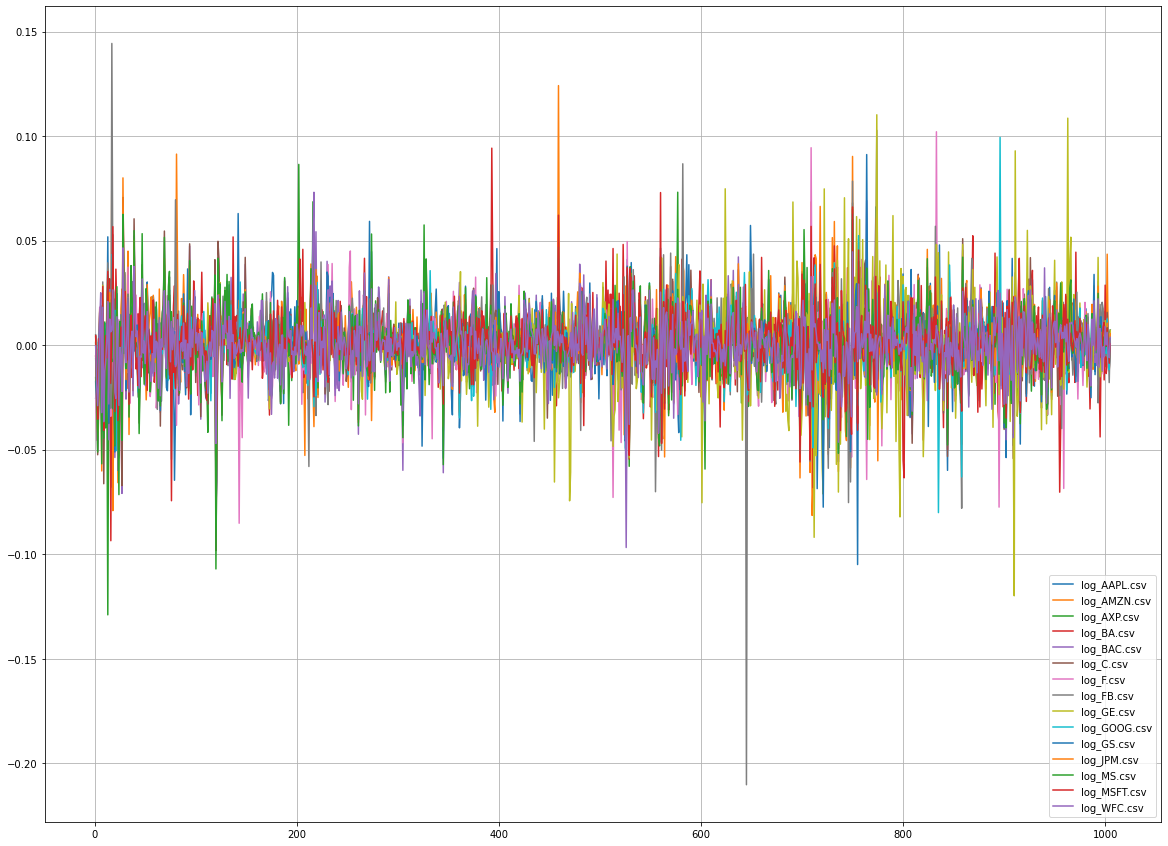

In [38]:
for tick in t:
    close_[f'log_{tick}'] = np.log(close_[f"{tick}"]) - np.log(close_[f"{tick}"].shift(1))

log_close = close_.filter(regex="log")

log_close.plot(figsize=(20,15), grid=True)


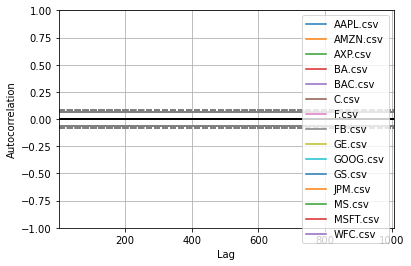

In [41]:
for tick, col in zip(t, log_close.columns):
    _ = autocorrelation_plot(log_close[col], label=tick)
    

In [43]:
log_close.corr()

,log_AAPL.csv,log_AMZN.csv,log_AXP.csv,log_BA.csv,log_BAC.csv,log_C.csv,log_F.csv,log_FB.csv,log_GE.csv,log_GOOG.csv,log_GS.csv,log_JPM.csv,log_MS.csv,log_MSFT.csv,log_WFC.csv
log_AAPL.csv,1.000000,0.543460,0.352436,0.376203,0.374850,0.430318,0.265968,0.441420,0.259041,0.578172,0.438723,0.409406,0.432417,0.591414,0.304931
log_AMZN.csv,0.543460,1.000000,0.338342,0.350269,0.329198,0.364759,0.244691,0.589366,0.219244,0.664699,0.373345,0.331791,0.382018,0.667345,0.280420
log_AXP.csv,0.352436,0.338342,1.000000,0.386350,0.579110,0.590303,0.405009,0.270654,0.299117,0.389191,0.563919,0.594763,0.589115,0.463765,0.521414
log_BA.csv,0.376203,0.350269,0.386350,1.000000,0.425541,0.439143,0.297496,0.282373,0.253263,0.375458,0.442048,0.443548,0.449143,0.417683,0.374458
log_BAC.csv,0.374850,0.329198,0.579110,0.425541,1.000000,0.872105,0.461516,0.285139,0.349950,0.385810,0.822184,0.894084,0.858785,0.434943,0.761358
log_C.csv,0.430318,0.364759,0.590303,0.439143,0.872105,1.000000,0.510405,0.311693,0.392778,0.426936,0.806261,0.875971,0.856736,0.481996,0.740332
log_F.csv,0.265968,0.244691,0.405009,0.297496,0.461516,0.510405,1.000000,0.295300,0.339208,0.283320,0.453825,0.483224,0.506550,0.312224,0.437990
log_FB.csv,0.441420,0.589366,0.270654,0.282373,0.285139,0.311693,0.295300,1.000000,0.200253,0.613582,0.319940,0.290110,0.315082,0.532889,0.227478
log_GE.csv,0.259041,0.219244,0.299117,0.253263,0.349950,0.392778,0.339208,0.200253,1.000000,0.233583,0.360054,0.355131,0.370339,0.240277,0.305689
log_GOOG.csv,0.578172,0.664699,0.389191,0.375458,0.385810,0.426936,0.283320,0.613582,0.233583,1.000000,0.439423,0.407833,0.443485,0.718510,0.348678
